# Practical 7

## Aim : Demostrate PCA and K-Means clustering using Interests group data set

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv(r"D:\Sem 4\AML\Datasets\kaggle_Interests_group.csv")

In [3]:
df.head()

,group,grand_tot_interests,interest1,interest2,interest3,interest4,interest5,interest6,interest7,interest8,...,interest208,interest209,interest210,interest211,interest212,interest213,interest214,interest215,interest216,interest217
0,C,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C,43,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
2,C,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
3,C,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN
4,C,36,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN


In [4]:
df.isnull().sum()

group                     0
grand_tot_interests       0
interest1              5347
interest2              6339
interest3              6305
                       ... 
interest213            6338
interest214            6268
interest215            1397
interest216            2282
interest217            6193
Length: 219, dtype: int64

In [5]:
df.shape

(6340, 219)

In [6]:
df.columns

Index(['group', 'grand_tot_interests', 'interest1', 'interest2', 'interest3',
       'interest4', 'interest5', 'interest6', 'interest7', 'interest8',
       ...
       'interest208', 'interest209', 'interest210', 'interest211',
       'interest212', 'interest213', 'interest214', 'interest215',
       'interest216', 'interest217'],
      dtype='object', length=219)

In [7]:
df.duplicated().sum()

159

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df

,group,grand_tot_interests,interest1,interest2,interest3,interest4,interest5,interest6,interest7,interest8,...,interest208,interest209,interest210,interest211,interest212,interest213,interest214,interest215,interest216,interest217
0,C,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C,43,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
2,C,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
3,C,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN
4,C,36,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6335,I,53,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN
6336,I,48,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
6337,I,48,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
6338,I,38,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN


In [10]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=0)

In [11]:
x = df.drop(['group'],axis=1)
y= df['group']

In [12]:
x_impute = si.fit_transform(x)

In [13]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [14]:
x_scaled = ss.fit_transform(x_impute)

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [16]:
x_pca = pca.fit_transform(x_scaled)

In [17]:
x_pca

array([[-5.40493727,  0.43104162],
       [ 1.55700525, -2.99046763],
       [-2.46053769,  1.92385585],
       ...,
       [ 2.58246808,  0.7358132 ],
       [ 0.91993309, -2.38399774],
       [ 7.62601203, -4.89257953]])

In [18]:
from sklearn.cluster import KMeans

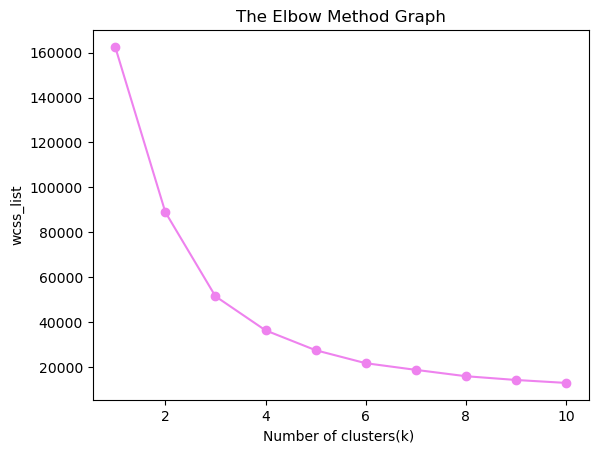

In [19]:
wcss_list = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=1)
    kmeans.fit(x_pca)
    wcss_list.append(kmeans.inertia_) #inertia is pre-defined attribute
plt.plot(range(1,11),wcss_list,color='violet',marker='o')
plt.title("The Elbow Method Graph")
plt.xlabel("Number of clusters(k) ")
plt.ylabel('wcss_list')
plt.show()

In [20]:
from kneed import KneeLocator
kl = KneeLocator(range(1,11),wcss_list,curve='convex',direction='decreasing')
kl.elbow

3

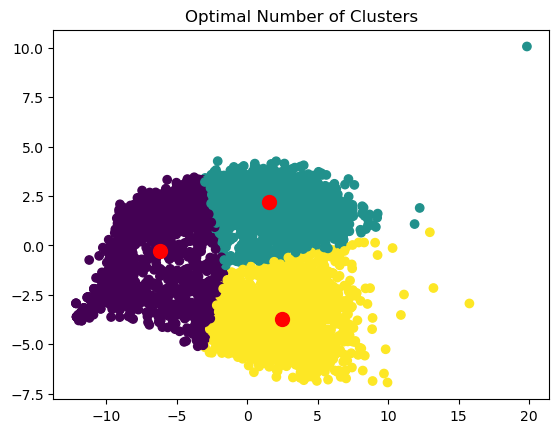

In [21]:
kmeans = KMeans(n_clusters=3)
y_pred = kmeans.fit_predict(x_pca)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_pred)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='red',label="Centroid")
plt.title("Optimal Number of Clusters")
plt.show()